In [7]:
from ROOT import TFile, TH1D, TDirectory, TF1, TCanvas

def _normalize( hist ):
    
    ee=hist.GetEntries()
    hist.Scale(1/ee)
    
    return 

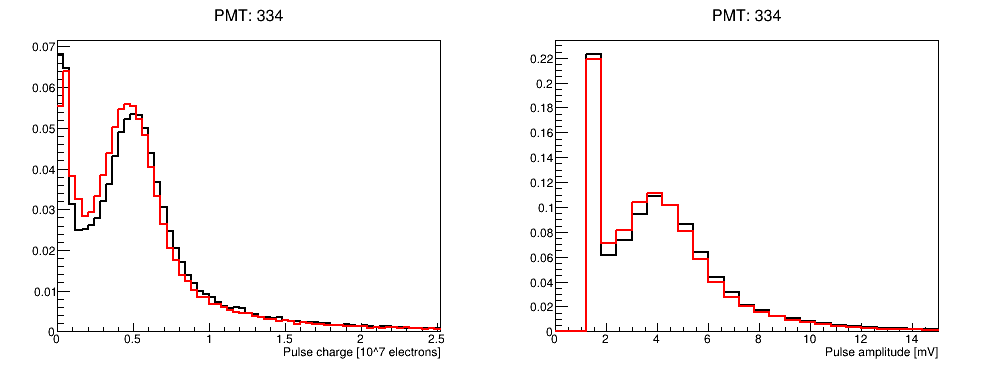

In [21]:
# [ 30, 99, 120, 162, 166, 264, 334 ]:

channel=334

tfile1=TFile.Open("../histograms/pulseDistributionHist_run7412.root")
tfile2=TFile.Open("../histograms/pulseDistributionHist_run7449.root")

canvas = TCanvas("c%d" % channel, "c%d" % channel, 1000, 400)

canvas.Divide(2,1)

for i, tfile in enumerate([ tfile1, tfile2 ]):
    
    hamplitude = tfile.Get("bkgcalibration/hamplitude%d" % channel)
    hcharge    = tfile.Get("bkgcalibration/hintegral%d" % channel)
                   
    pad = canvas.cd(1)
    
    _normalize( hcharge )
        
    hcharge.SetStats(0)
    hcharge.GetXaxis().SetRangeUser(0,2.5)
    hcharge.SetLineWidth(2)
    hcharge.SetLineColor(i+1)
    hcharge.Draw("hist same")

    canvas.cd(2)
    
    _normalize( hamplitude )
    
    hamplitude.SetStats(0)
    hamplitude.GetXaxis().SetRangeUser(0,15)
    hamplitude.SetLineWidth(2)
    hamplitude.SetLineColor(i+1)
    hamplitude.Draw("hist same")
    
canvas.Draw("")
    

  